# Import

In [1]:
import HCAM
from torchvision.models import *
from fastai.vision.all import *

# Image Loader

In [2]:
dls = HCAM.Img_loader(fil_path = 'random_pet_one',resize = 512)

# CAM

In [3]:
lrnr=cnn_learner(dls,resnet34,metrics=error_rate)
lrnr.fine_tune(1)

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.126807,0.014369,0.004736,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.001658,0.000015,0.000000,00:43


In [4]:
net1=lrnr.model[0]
net2=lrnr.model[1]

In [5]:
net2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [6]:
net=torch.nn.Sequential(net1,net2)

In [7]:
lrnr2=Learner(dls,net,metrics=accuracy) 

In [8]:
lrnr2.fine_tune(1) 

epoch,train_loss,valid_loss,accuracy,time
0,0.007234,41.652428,0.834912,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.002172,0.001362,0.999323,00:43


In [9]:
x_cat, = first(dls.test_dl([PILImage.create(get_image_files(Path('random_pet_one'))[2])]))
x_cat = x_cat.to('cpu')

# HCAM

## Mode 1

In [10]:
one = HCAM.HCAM(lrnr = lrnr2)

In [11]:
one.learner_thresh(Thresh=1600,input_img=x_cat)

/home/csy/Dropbox/blog/posts/CAM/HCAM/learners.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
/home/csy/Dropbox/blog/posts/CAM/HCAM/learners.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ybar_threshed = np.where(power_threshed>Thresh,torch.tensor(camimg[0].detach().reshape(-1)),0)


In [12]:
one.learner_step(Rate=-0.05)

In [13]:
one.prob(input_img=x_cat)

In [14]:
one.mode_decomp(input_img=x_cat)

In [15]:
# one(input_img=x_cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


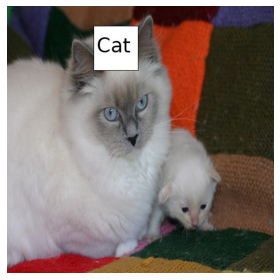

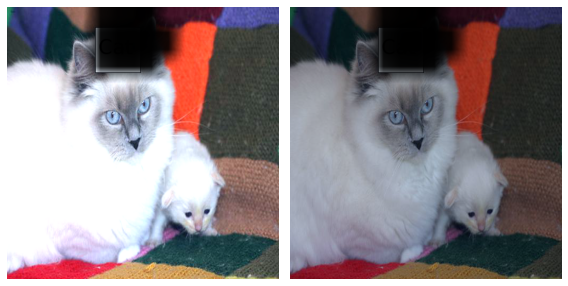

In [16]:
HCAM.plot(dls,input_img=x_cat,
         input_img1=one(input_img=x_cat)['x'],input_img1_res=one(input_img=x_cat)['x_res'],
         one=0.35, one_res=0.2)

## Mode 2

In [17]:
one.learner_thresh(Thresh=1600,input_img=one(input_img=x_cat)['x_res'])

In [18]:
one.learner_step(Rate=-0.05)

In [19]:
one.prob(input_img=one(input_img=x_cat)['x_res'])

In [20]:
one.mode_decomp(input_img=one(input_img=x_cat)['x_res'])

In [21]:
# one(input_img=one(input_img=x_cat)['x_res'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


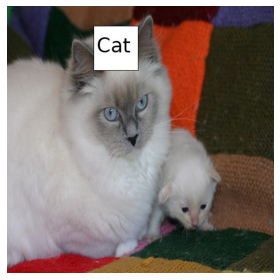

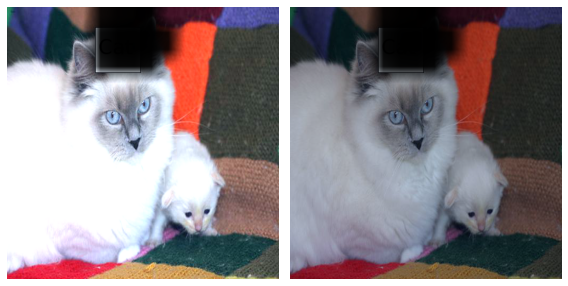

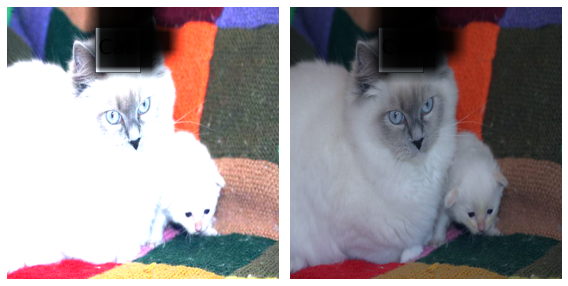

In [22]:
HCAM.plot(dls,input_img=x_cat,
         input_img1=one(input_img=x_cat)['x'],input_img1_res=one(input_img=x_cat)['x_res'],
         input_img2=one(input_img=one(input_img=x_cat)['x'])['x'],input_img2_res=one(input_img=one(input_img=x_cat)['x_res'])['x_res'],
         one=0.35, one_res=0.2, two=0.5, two_res=0.2)

# Other Methods

In [23]:
gradcam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='gradcam',input_img=x_cat)

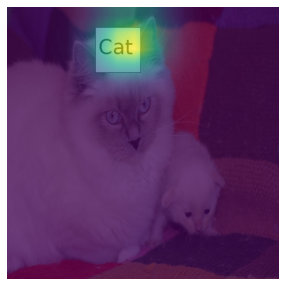

In [24]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(gradcam.squeeze(), alpha=0.7)

In [25]:
hirescam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='hirescam',input_img=x_cat)

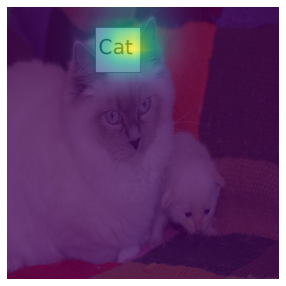

In [26]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(hirescam.squeeze(), alpha=0.7)

In [27]:
gradcamplusplus = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='gradcamplusplus',input_img=x_cat)

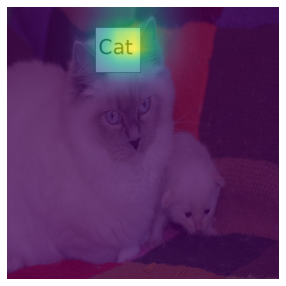

In [28]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(gradcamplusplus.squeeze(), alpha=0.7)

In [29]:
ablationcam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='ablationcam',input_img=x_cat)

100%|██████████| 16/16 [00:26<00:00,  1.65s/it]


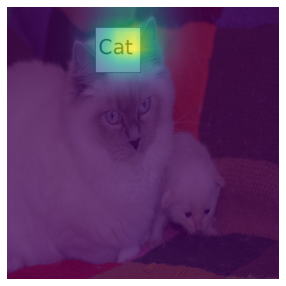

In [30]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(ablationcam.squeeze(), alpha=0.7)

In [31]:
xgradcam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='xgradcam',input_img=x_cat)

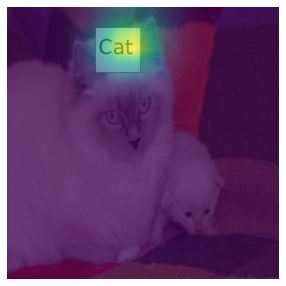

In [32]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(xgradcam.squeeze(), alpha=0.7)

In [33]:
eigencam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='eigencam',input_img=x_cat)

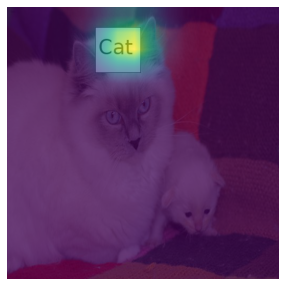

In [34]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(eigencam.squeeze(), alpha=0.7)

In [35]:
fullgrad = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='fullgrad',input_img=x_cat)

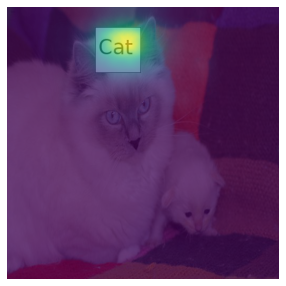

In [36]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(fullgrad.squeeze(), alpha=0.7)

In [37]:
eigengradcam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='eigengradcam',input_img=x_cat)

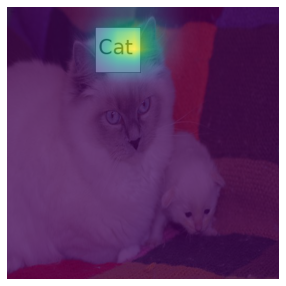

In [38]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(eigengradcam.squeeze(), alpha=0.7)

In [39]:
layercam = HCAM.Other_method(lrnr=lrnr2, status='cpu', cam_method='layercam',input_img=x_cat)

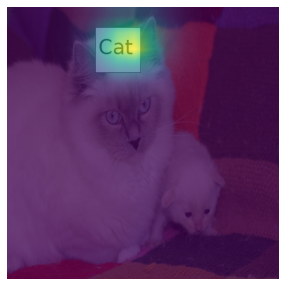

In [40]:
dls.train.decode((x_cat,))[0].squeeze().show()
plt.imshow(layercam.squeeze(), alpha=0.7)